In [2]:
%pip install matplotlib

  Using cached matplotlib-3.7.1-cp39-cp39-macosx_11_0_arm64.whl (7.3 MB)
  Using cached contourpy-1.0.7-cp39-cp39-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.5.0-cp39-cp39-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import matplotlib.pyplot as plt

In [4]:
def dashed(string):
    pattern = re.compile(r'([A-Za-z]+)(\d+)')  # Pattern to match alphabetic and numeric portions
    converted_string = pattern.sub(r'\1-\2', string)
    return converted_string

def contains_alphabets_and_numbers(string):
    has_alphabets = bool(re.search('[a-zA-Z]', string))
    has_numbers = bool(re.search('[0-9]', string))
    return has_alphabets and has_numbers

In [14]:
pdf_file = open("all_pdfs.txt", "r")
body = pdf_file.read()
pdf_file.close()
frequencies = dict()

gene_file = open("manual_list.txt", "r")
gene_list = gene_file.readlines()
gene_list = [gene.rstrip('\n') for gene in gene_list]
gene_file.close()
# print(gene_list)

for gene in gene_list:
    if contains_alphabets_and_numbers(gene):
        frequencies[gene] = body.upper().count(gene) + body.upper().count(dashed(gene))
    else:
        frequencies[gene] = body.count(gene) + body.count(dashed(gene))

gene_file = open("manual_list.txt", "w")
gene_file.writelines([gene+"\n" for gene in gene_list if frequencies[gene] > 0])
gene_file.close()

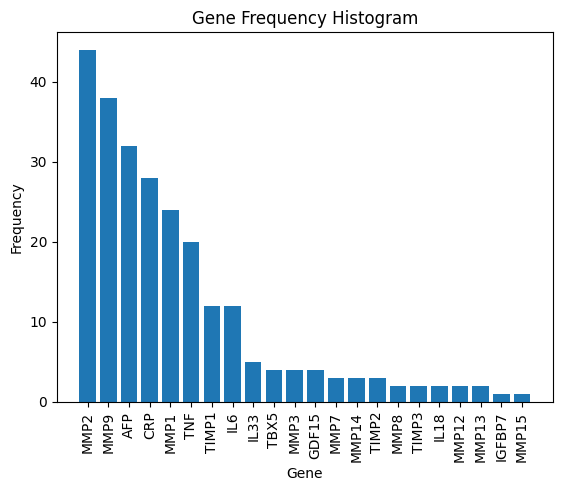

In [15]:
sorted_data = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
genes, frequency = zip(*sorted_data)

# Create a bar plot
plt.bar(genes, frequency)

# Customize the plot
plt.xlabel('Gene')
plt.ylabel('Frequency')
plt.title('Gene Frequency Histogram')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility

# Display the plot
plt.show()